In [1]:
!pip install seaborn
!pip install imblearn
!pip install sklearn
!pip install torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import os
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import Dataset, DataLoader

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [20]:
df = pd.read_csv('All.csv', header = None)

In [21]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [22]:
df.rename(columns = {187: 'classes'}, inplace = True)

In [23]:
pd.unique(df['classes'])
df['classes'] = df['classes'].astype(int)

<Axes: >

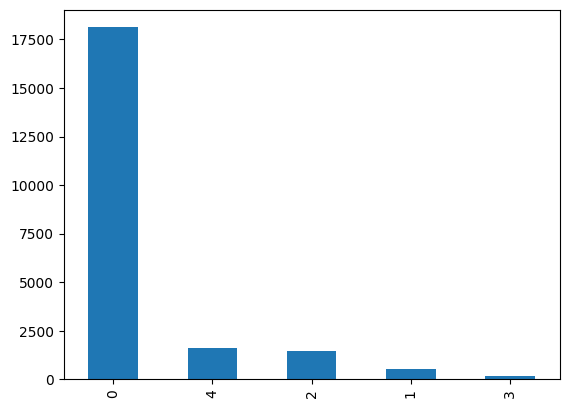

In [24]:
df['classes'].value_counts().plot(kind = 'bar')

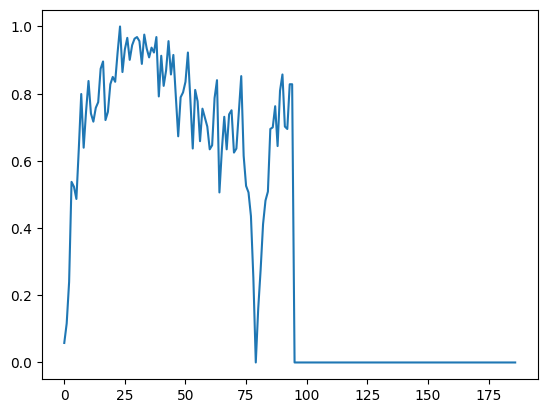

In [25]:
plt.plot(df.iloc[100, :-1])

<Axes: >

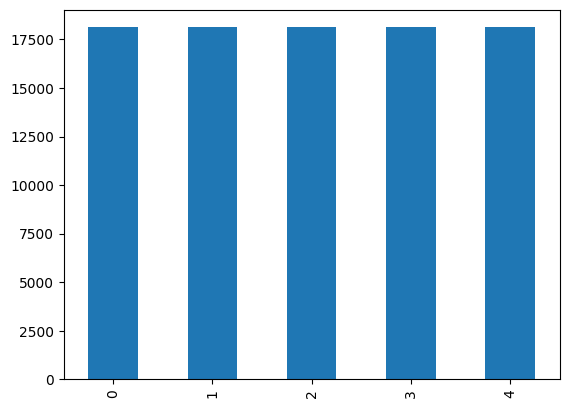

In [26]:
smote = SMOTE(random_state = 42)
X = df.drop('classes', axis = 1)
y = df['classes']
X_sm, y_sm = smote.fit_resample(X, y)
df_sm = pd.concat([X_sm, y_sm], axis = 1)
df_sm = df_sm.reset_index()
df_sm.drop(['index'], axis = 1, inplace=True)
df_sm['classes'].value_counts().plot(kind = 'bar')

In [27]:

df_sm

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,classes
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90585,1.000000,0.933810,0.870084,0.798425,0.714010,0.611116,0.504401,0.389792,0.300091,0.251837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
90586,0.988732,0.971058,0.957648,0.937420,0.914619,0.908611,0.896723,0.891859,0.890018,0.895896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
90587,0.867169,0.548835,0.584703,0.593003,0.561100,0.555485,0.530247,0.455866,0.313427,0.192248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
90588,0.862061,0.524983,0.545902,0.551234,0.537730,0.520671,0.488681,0.401655,0.278734,0.127990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


<Axes: >

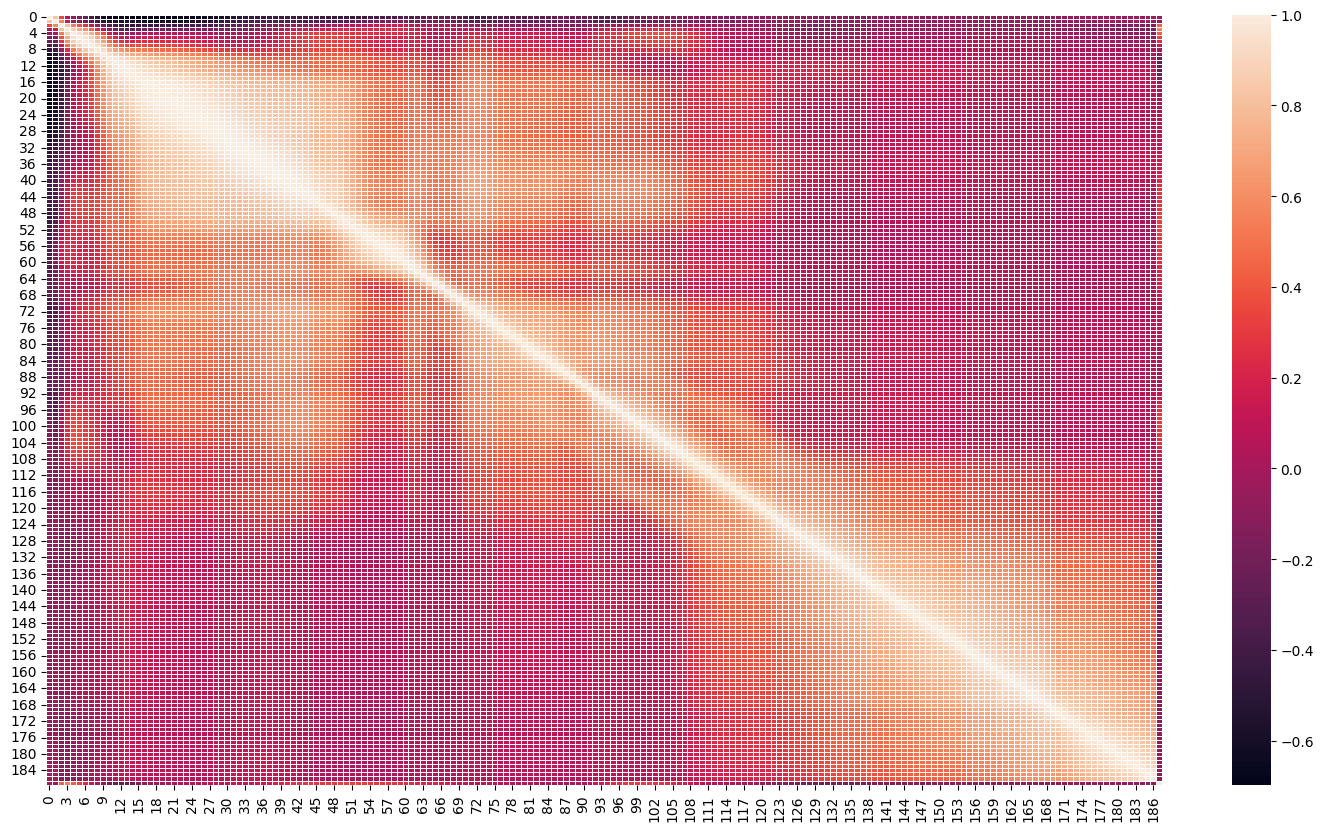

In [28]:
df_sm_corr = df_sm.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(df_sm_corr, annot=False, linewidths=0.5, fmt= ".2f")